La première étape est de télécharger le package https://github.com/facelessuser/coloraide

In [ ]:
pip install coloraide

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.6/244.6 kB 3.6 MB/s eta 0:00:00


In [ ]:
from coloraide import Color

distance_rgb = Color("red").distance("blue", space="srgb")
print(distance_rgb)

distance_hsl = Color("red").distance("blue", space="lab-d65")
print(distance_hsl)

1.4142135623730951
176.3084955965824
{'space': 'srgb', 'coords': [1.0, 0.0, 0.0], 'alpha': 1.0}


In [ ]:
d = Color('green').to_dict()
print(d)

{'space': 'srgb', 'coords': [0.0, 0.5019607843137255, 0.0], 'alpha': 1.0}


<ipython-input-9-7c7c22c83273>:41: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(L, a, b, c=rgb_colors, cmap='viridis')


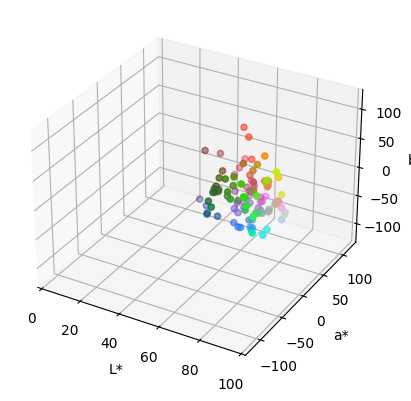

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def func(t):
    if (t > 0.008856):
        return np.power(t, 1/3.0);
    else:
        return 7.787 * t + 16 / 116.0;

#Conversion Matrix
matrix = [[0.412453, 0.357580, 0.180423],
          [0.212671, 0.715160, 0.072169],
          [0.019334, 0.119193, 0.950227]]

# Generate 100 random colors in RGB space
rng = np.random.default_rng()
rgb_colors = np.array([rng.random() for _ in range(300)])
rgb_colors.resize((100, 3))

# Calculate the CIELAB values for each color
cie_colors = []
for rgb in rgb_colors:
    cie = np.dot(matrix, rgb)
    cie[0] = cie[0] / 0.950456
    cie[2] = cie[2] / 1.088754
    L = 116 * np.power(cie[1], 1/3.0) - 16.0 if cie[1] > 0.008856 else 903.3 * cie[1]
    a = 500 * (func(cie[0]) - func(cie[1]))
    b = 200 * (func(cie[1]) - func(cie[2]))
    cie_colors.append([b, a, L])
cie_colors = np.array(cie_colors)

# Extract L*, a*, and b* values
L = cie_colors[:, 2]
a = cie_colors[:, 1]
b = cie_colors[:, 0]

# Create a 3D scatter plot of the colors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(L, a, b, c=rgb_colors, cmap='viridis')

# Set axis labels and limits
ax.set_xlabel('L*')
ax.set_ylabel('a*')
ax.set_zlabel('b*')
ax.set_xlim([0, 100])
ax.set_ylim([-128, 128])
ax.set_zlim([-128, 128])

# Show the plot
plt.show()